# Oferta de Terrenos en venta en CABA 

## Descripción del Dataset.
* Últimos datos disponibles: 2020.

La información utilizada se encuentra disponible de forma pública en el sitio web de la Ciudad de Buenos Aires. 
URL: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv

En el presente notebook se relizará un análisis exploratorio de lo datos centrados en las diferentes Comunas de la Cuiudad de Buenos Aires. 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats as st
plt.style.use('ggplot')


In [134]:
df = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv')

In [135]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


In [136]:
df=df.rename(columns= #renombrado de columnas para mejor interpetación
             {
                 'PROPIEDADS':'Superficie',
                 'PRECIOUSD':'PrecioUSD',
                 'TRIMESTRE_':'Trimestre',
                 'COMUNA_':'Comuna'
             })
df.columns = df.columns.str.title() #Convierte todos los nombres de columnas con la primer letra mayúscula. 
df.head()

,Direccion,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Barrio,Comuna
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


In [137]:
df.columns

Index(['Direccion', 'Superficie', 'Preciousd', 'Preciopeso', 'Dolarm2',
       'Pesosm2', 'Cotizacion', 'Trimestre', 'Barrio', 'Comuna'],
      dtype='object')

In [138]:
df.dtypes

Direccion     object
Superficie     int64
Preciousd      int64
Preciopeso     int64
Dolarm2        int64
Pesosm2        int64
Cotizacion     int64
Trimestre     object
Barrio        object
Comuna         int64
dtype: object

In [139]:
#reemplazo el nombre del trimestre por el correspondiente número para operaciones cálculos más adelante.
trimestres=df.Trimestre.unique()
reemplazo=[4,1,2,3]

for i in range(4):
    df['Trimestre']=df.Trimestre.replace(trimestres[i], reemplazo[i])



In [140]:
df.describe()

,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Comuna
count,10301.000000,1.030100e+04,1.030100e+04,10301.000000,1.030100e+04,10301.000000,10301.000000,10301.000000
mean,455.793224,9.047248e+05,6.079176e+07,2357.650811,1.578518e+05,67.210659,2.118241,9.256189
std,766.807591,1.131263e+06,7.824747e+07,1600.258396,1.075193e+05,4.017352,0.558429,4.329207
min,30.000000,6.800000e+04,4.352000e+06,355.000000,2.270500e+04,64.000000,1.000000,1.000000
25%,200.000000,3.500000e+05,2.352000e+07,1238.000000,8.323400e+04,64.000000,2.000000,5.000000
50%,291.000000,5.800000e+05,3.825000e+07,1918.000000,1.283210e+05,67.000000,2.000000,10.000000
75%,433.000000,9.800000e+05,6.400000e+07,3019.000000,2.008670e+05,70.000000,2.000000,13.000000
max,14303.000000,1.600000e+07,1.280000e+09,21429.000000,1.714286e+06,80.000000,4.000000,15.000000


In [141]:
df.Comuna.value_counts()

15    1531
12    1150
11    1004
10     965
4      806
3      688
5      664
7      603
9      593
13     578
14     578
1      529
6      414
8      118
2       80
Name: Comuna, dtype: int64

In [142]:
df.isnull().sum() #hay 6 valores nulos en la dirección.

Direccion     6
Superficie    0
Preciousd     0
Preciopeso    0
Dolarm2       0
Pesosm2       0
Cotizacion    0
Trimestre     0
Barrio        0
Comuna        0
dtype: int64

In [143]:
#diferentes cotizaciones de dolar en el dataset.
df.Cotizacion.unique()

array([80, 64, 70, 67], dtype=int64)

## Evaluación de la presencia de datos faltantes

* Faltan 6 direcciones. No parecen estar duplicados aunque falte la dirección porque el precio por M2 y la superficie, comuna, barrio no coinciden entre sí. 

In [144]:
df.loc[df.Direccion.isnull(),:] #los duplicados, aunque no tienen direccion, no parecen ser duplicados.

,Direccion,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Barrio,Comuna
2256,NaN,323,1600000,102400000,4954,317028,64,2,NUÑEZ,13
2976,NaN,1100,3500000,224000000,3182,203636,64,2,VILLA CRESPO,15
3017,NaN,1050,520000,33280000,495,31695,64,2,VILLA CRESPO,15
3981,NaN,221,420000,26880000,1900,121629,64,2,PARQUE PATRICIOS,4
3985,NaN,128,350000,22400000,2734,175000,64,2,PARQUE PATRICIOS,4
4164,NaN,260,450000,28800000,1731,110769,64,2,VILLA LURO,10


## Evaluación de la presencia de datos duplicados/redundantes

* Se observa que hay combinación de direcciones, superficies y precio m2 en dólares que se repiten, independientemente del número de trimestre. 
* Las repeticiones están ocasionadas por el valor de la cotización del dólar y la conversión a pesos de los precios de los terrenos. 
* En este análisis es de interés la evolución de precios en pesos ni el tipo de cambio. Primero se removerán estas variables y luego se eliminaran los duplicados generados por esto.

In [145]:
#elimino las variables que no son de interés. 
df_dolar=df.drop(['Pesosm2','Preciopeso','Cotizacion'], axis=1)
df_dolar

,Direccion,Superficie,Preciousd,Dolarm2,Trimestre,Barrio,Comuna
40,AGRELO 3200,270,319000,1182,4,BALVANERA,3
129,CABILDO 400,868,9500000,10945,4,PALERMO,14
178,BASAVILBASO 1200,2804,10000000,3566,4,RETIRO,1
207,"BELAUSTEGUI, LUIS, Dr. 1200",150,265000,1767,4,CABALLITO,6
329,LOYOLA 800,200,500000,2500,4,VILLA CRESPO,15
...,...,...,...,...,...,...,...
10257,"RAMIREZ, CARLOS M.",316,195000,617,2,VILLA SOLDATI,8
10258,BERON DE ASTRADA,9969,4650000,466,2,VILLA SOLDATI,8
10267,"ALVAREZ DE ACEVEDO, TOMAS 1700",150,600000,4000,3,PARQUE AVELLANEDA,9
10282,CAFAYATE,225,150000,667,2,VILLA LUGANO,8


In [146]:
#revisamos los terrenos duplicados

duplicate=df[df.duplicated(['Direccion', 'Superficie', 'Barrio', 'Preciousd'], keep=False)].sort_values(by='Direccion')

duplicate

,Direccion,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Barrio,Comuna
2705,.ANDONAEGUI,364,450000,28800000,1236,79121,64,2,PARQUE CHAS,15
8054,.ANDONAEGUI,364,450000,30240000,1236,83077,67,2,PARQUE CHAS,15
6388,.ANDONAEGUI,364,450000,31275000,1236,85920,70,2,PARQUE CHAS,15
8055,.CAMPILLO,364,500000,33600000,1374,92308,67,2,PARQUE CHAS,15
2702,.CAMPILLO,364,500000,32000000,1374,87912,64,2,PARQUE CHAS,15
...,...,...,...,...,...,...,...,...,...,...
6043,zavaleta al 200,201,250000,17375000,1244,86443,70,2,PARQUE PATRICIOS,4
9264,zavaleta al 200,201,250000,16800000,1244,83582,67,2,PARQUE PATRICIOS,4
8090,Álvarez Jonte 2100,244,370000,24864000,1516,101902,67,2,PATERNAL,15
2761,Álvarez Jonte 2100,244,370000,23680000,1516,97049,64,2,PATERNAL,15


In [147]:
# se repiten propiedades durante el mismo trimestre por variación en la cotización del dólar.
duplicate.sort_values(['Direccion', 'Trimestre'])  


,Direccion,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Barrio,Comuna
2705,.ANDONAEGUI,364,450000,28800000,1236,79121,64,2,PARQUE CHAS,15
8054,.ANDONAEGUI,364,450000,30240000,1236,83077,67,2,PARQUE CHAS,15
6388,.ANDONAEGUI,364,450000,31275000,1236,85920,70,2,PARQUE CHAS,15
8055,.CAMPILLO,364,500000,33600000,1374,92308,67,2,PARQUE CHAS,15
2702,.CAMPILLO,364,500000,32000000,1374,87912,64,2,PARQUE CHAS,15
...,...,...,...,...,...,...,...,...,...,...
6043,zavaleta al 200,201,250000,17375000,1244,86443,70,2,PARQUE PATRICIOS,4
9264,zavaleta al 200,201,250000,16800000,1244,83582,67,2,PARQUE PATRICIOS,4
8090,Álvarez Jonte 2100,244,370000,24864000,1516,101902,67,2,PATERNAL,15
2761,Álvarez Jonte 2100,244,370000,23680000,1516,97049,64,2,PATERNAL,15


Se eliminaron terrenos duplicados teniendo en cuenta solo la cotización en dólares. 

In [148]:
#elimino duplicados
df_dolar=df_dolar.drop_duplicates()

#checkeo que no hay más duplicados
print(df_dolar[df_dolar.duplicated()].shape)

#checkeo con un ejemplo que se retuvo uno de los registros para los duplicados
df_dolar.loc[df_dolar['Direccion']=='.ANDONAEGUI',:] 

(4660, 7)


,Direccion,Superficie,Preciousd,Dolarm2,Trimestre,Barrio,Comuna
2705,.ANDONAEGUI,364,450000,1236,2,PARQUE CHAS,15
6388,.ANDONAEGUI,364,450000,1236,2,PARQUE CHAS,15
8054,.ANDONAEGUI,364,450000,1236,2,PARQUE CHAS,15


Algunos terrenos permanecieron en venta durante más de un trimestre. Sin embargo, no queremos contar estos terrenos más de una vez. 
Vamos a identificar estos duplicados por aquellos que coincide la Superficie y la Dirección. En caso de duplicados exactos con excepción del trimestre, se va a elegir el dato del último trimestre. En caso de variaciones en el precio por metro cuadrado en dólares, se va a conservar el registro con el de mayor precio. 

In [38]:
#seleccionamos los datos duplicados y ordenamos por Trimestre (descendente) y Valor del metro cuadrado (descendente)
#keep funciona de la siguiente forma. 
#keep por default es 'First', con lo cual solo muestra el primero.
#keep= False. Muestra todos los duplicados. Utilizamos Keep false para poder visualizar todos los duplicados 
#y entonces elegir con cual quedarnos. 

duplicados_todos = df_dolar[df_dolar.duplicated(['Direccion', 'Superficie'], keep=False)].sort_values(['Direccion', 'Superficie','Trimestre','Dolarm2'], ascending=[True, True, False, False])
print(f'todos los duplicados: {duplicados_todos.shape}')


#contamos con cuántos datos de los identificados como duplicados nos vamos a quedar
uno_por_duplicado=df_dolar[df_dolar.duplicated(['Direccion', 'Superficie'], keep='first')]
print(f'cantidad de datos a conservar: {uno_por_duplicado.shape}')

#dataframe con los duplicados seleccionados par conservar
conservar = duplicados_todos.drop_duplicates(['Direccion', 'Superficie'], keep='first')
print(f' nro de duplicados a conservar: {conservar.shape}')
#duplicados.to_excel('duplicados2.xlsx')

#datos no duplicasos
no_duplicados=df_dolar[~df_dolar.duplicated(['Direccion', 'Superficie'], keep=False)]
print(f' nro de datos sin duplicados {no_duplicados.shape}')

#creamos un nuevo dataframe con los datos duplicados a conservar y los datos no duplicados del df original
df_dolar_f=pd.concat([no_duplicados, conservar])
df_dolar_f.reset_index(inplace=True, drop=True) #nuevo indice para el df
df_dolar_f.head()

#revisamos que el numero de datos finales coincida con los cálculos anteriores
print(f' nuevo tamaño del datset: {df_dolar_f.shape}')


todos los duplicados: (960, 7)
cantidad de datos a conservar: (498, 7)
 nro de duplicados a conservar: (462, 7)
 nro de datos sin duplicados (4681, 7)
 nuevo tamaño del datset: (5143, 7)


## Descripción del tamaño (superficie) de los terrenos.

Se realizó un análisis descriptivo de la superficie de los terrenos agrupados por comuna. 

In [128]:
comunas_df=df_dolar_f.groupby(['Comuna']).agg({'Superficie':['sum','mean', 'median','std','count']})
comunas_df.reset_index(inplace=True)
comunas_df.columns=['Comuna', 'Superficie Total', 'Media', 'Mediana','sd','n']
comunas_df.apply(lambda x:x.round(1))


,Comuna,Superficie Total,Media,Mediana,sd,n
0,1,203022,709.9,484.0,924.9,286
1,2,20346,415.2,224.0,514.6,49
2,3,190132,549.5,302.0,1048.3,346
3,4,229387,589.7,328.0,787.2,389
4,5,173360,536.7,312.0,788.5,323
5,6,111266,567.7,300.0,1212.2,196
6,7,177655,558.7,309.0,1340.8,318
7,8,95790,1496.7,300.5,3367.5,64
8,9,101775,358.4,260.0,485.3,284
9,10,193184,411.0,278.0,469.9,470


La Comuna 15 es la que presenta la mayor superficie total de terrenos en venta. 

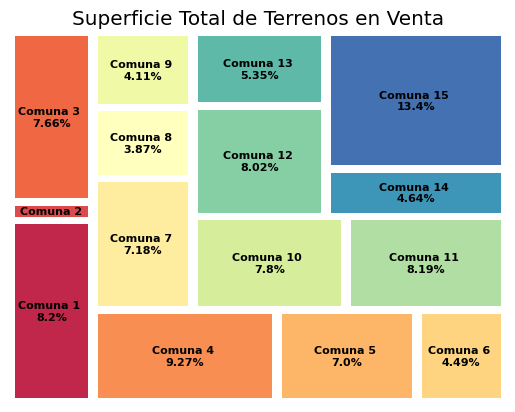

array([ 8.2 ,  0.82,  7.66,  9.27,  7.  ,  4.49,  7.18,  3.87,  4.11,
        7.8 ,  8.19,  8.02,  5.35,  4.64, 13.4 ])

In [38]:
import matplotlib.pyplot as plt
import squarify

# Datos
values = comunas_df.Porcentaje_M2.values
labels = ['Comuna ' + str(i) + ' \n' + str(comunas_df.Porcentaje_M2[i-1]) + '%'  for i in comunas_df.Comuna]

#comuna 2 xx% no entra en el recuadro, por lo que acorté esta label:
del labels[1]
labels.insert(1,'Comuna 2')

# Treemap
squarify.plot(sizes = values,
             label=labels, 
             color = sns.color_palette("Spectral", 15), 
             pad=0.25,
             text_kwargs={'fontsize':8, 'weight':'bold'}, 
             alpha=1)

# Remuevo el eje:
plt.axis('off')
plt.title('Superficie Total de Terrenos en Venta')

plt.show()


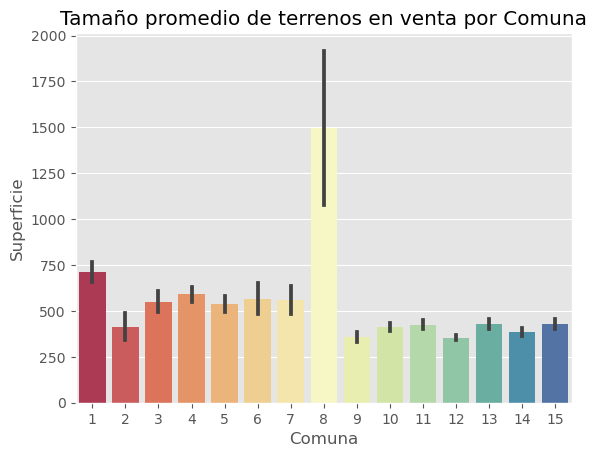

In [37]:
sns.barplot(df_dolar_f, x="Comuna", y="Superficie", 
            estimator="mean", 
            errorbar='se',
            palette=sns.color_palette('Spectral',15), 
            fill=True,
            width= 0.8)
plt.title('Tamaño promedio de terrenos en venta por Comuna')
plt.show()

A pesar de que la Comuna 15 cuenta con la mayor superficie total en venta, la Comuna 8 presenta el valor promedio más alto del tamaño de terrenos en venta. 

### Distribución de la Superficie de terrenos por comuna. 


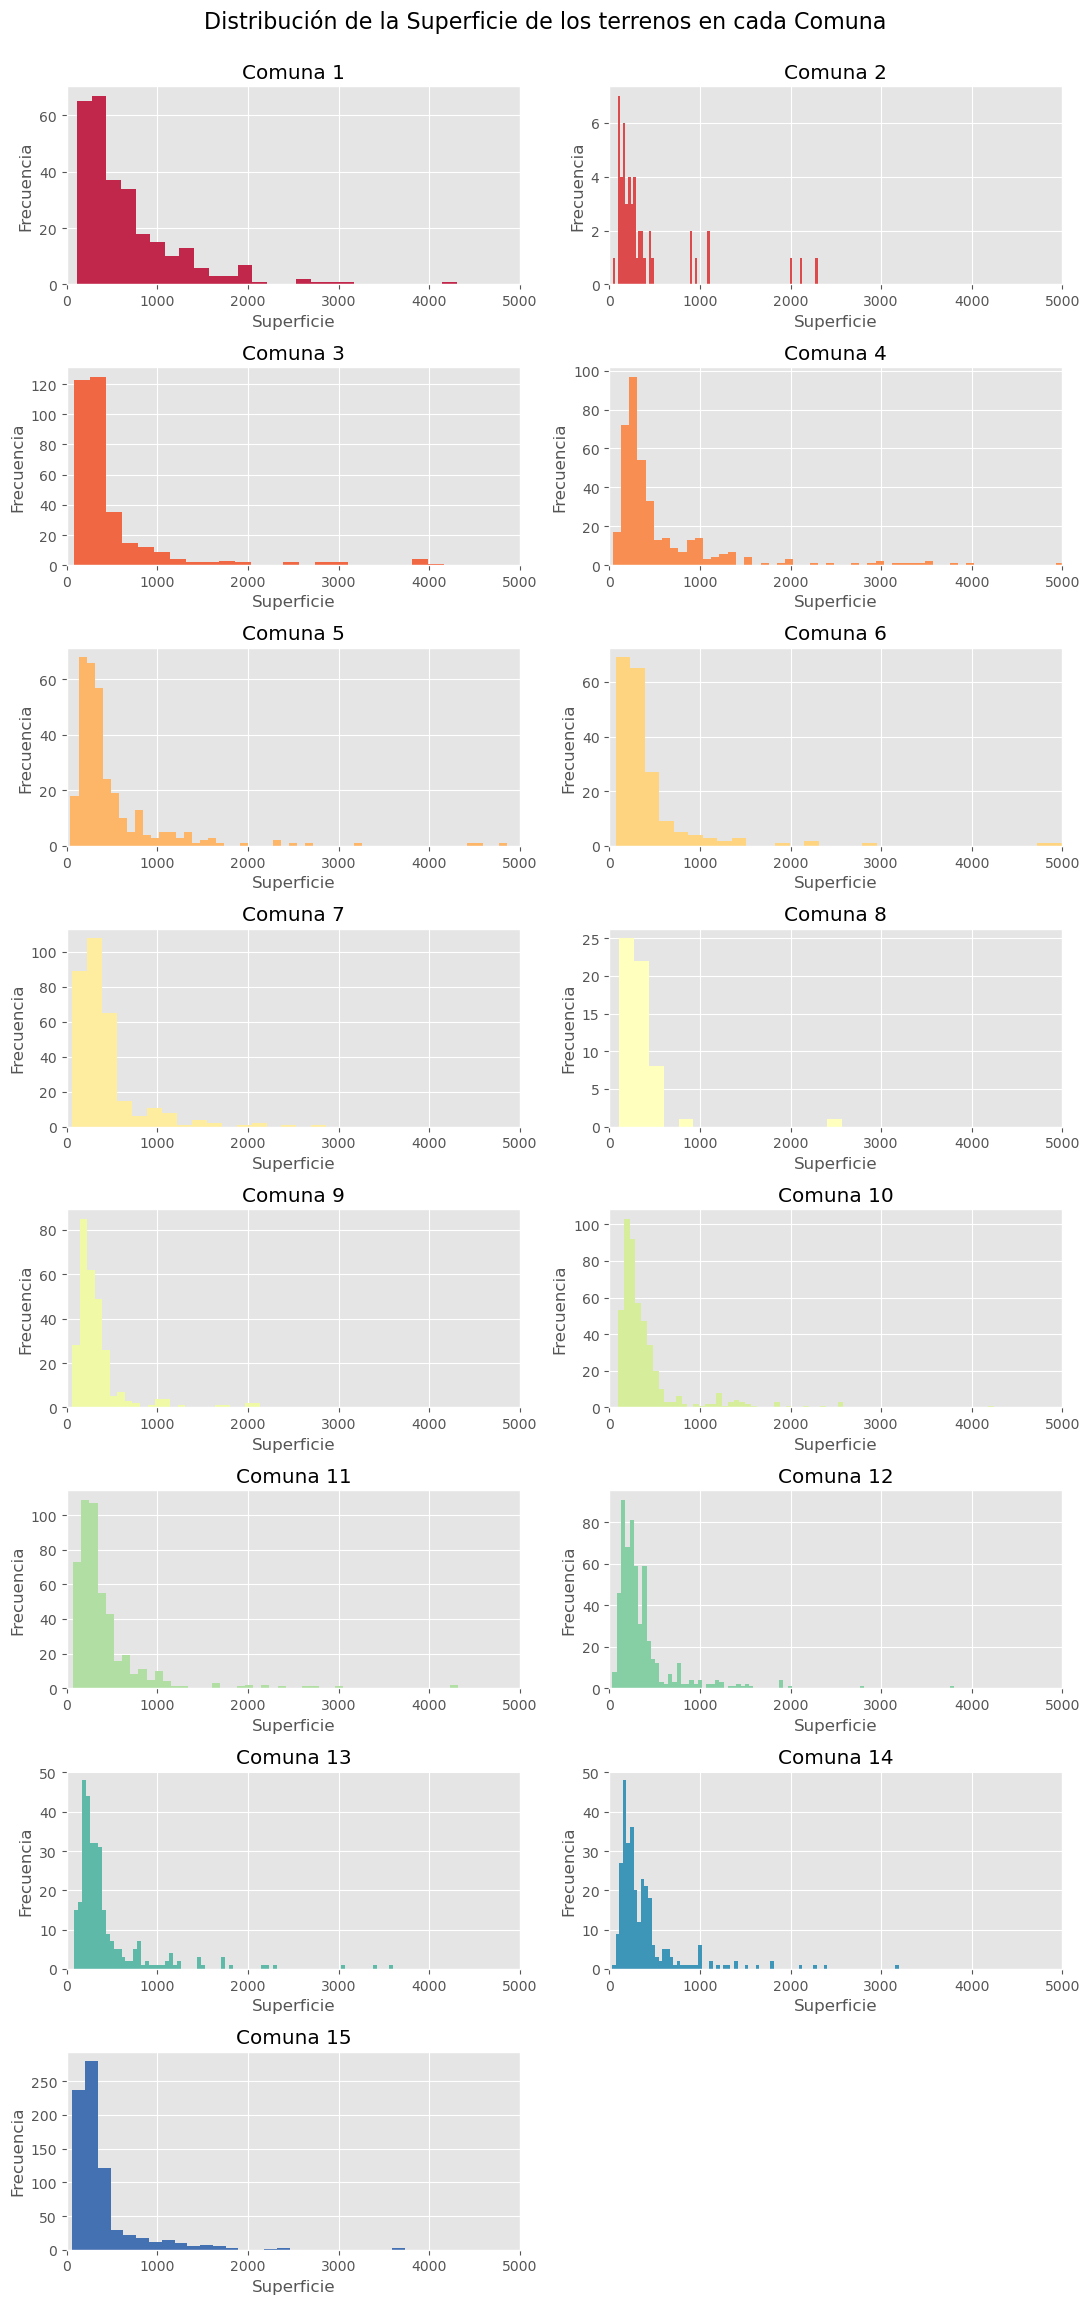

In [39]:
fig, ax = plt.subplots(8, 2, figsize=(11, 23))
fig.suptitle('Distribución de la Superficie de los terrenos en cada Comuna', fontsize=16, y=1.00)
comuna=[i for i in range (15)]

paleta= sns.color_palette ('Spectral', n_colors=len(comuna))

for i in range(8):
    for j in range(2):
        comuna_n=i*2+j+1 #calcula el nro de comuna de 1 a 16
        if comuna_n<16:
            color=paleta[comuna_n-1]
            ax[i, j].hist(df_dolar_f[df_dolar_f.Comuna == comuna_n]['Superficie'], bins=80, color=color)
            #print(comuna_n)
            ax[i, j].set_xlim(0, 5000)
            ax[i, j].set_title(f'Comuna {comuna_n}')
            ax[i, j].set_xlabel('Superficie')
            ax[i, j].set_ylabel('Frecuencia')
        if comuna_n==16: #elimina el subplot vacío de comuna 16
            break
for i in range(len(comuna), len(ax.flat)): #oculta los subplots no utilizados
    ax.flat[i].set_visible(False)
plt.tight_layout()
plt.show()
#revisar maximo!

In [40]:
comunas_cant=df_dolar_f.pivot_table(
    index='Comuna',
    values='Direccion',
        aggfunc='count'
)
comunas_cant.reset_index(inplace=True)

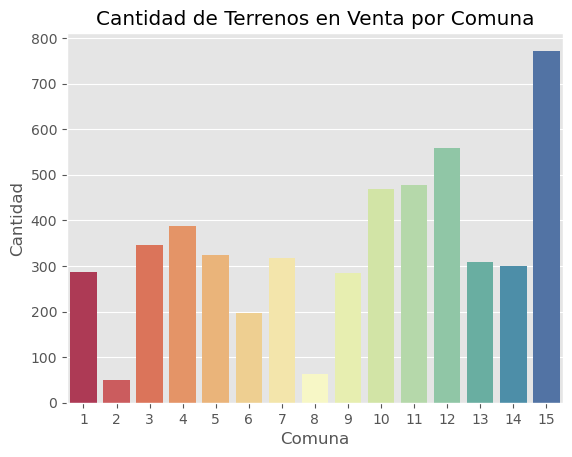

In [41]:
ax2=sns.barplot(data=comunas_cant, x='Comuna', y='Direccion',
           palette=sns.color_palette('Spectral',15), 
                fill=True,
                width= 0.8
                )
plt.title('Cantidad de Terrenos en Venta por Comuna')
ax2.set(ylabel= 'Cantidad')
#ax1.get_legend().remove()
plt.show()

## Precio del metro cuadrado por Comuna

In [120]:
comunas_precio=df_dolar_f.groupby('Comuna')['Dolarm2'].agg(['mean', 'sem']).reset_index()

comunas_precio=comunas_precio.rename(columns= #renombrado de columnas
             {
                 'mean':'Dolarm2',
                 'sem':'SE'
             })
comunas_precio['Dolarm2']=round(comunas_precio['Dolarm2'],1)
comunas_precio['SE']=round(comunas_precio['SE'],1)
comunas_precio

,Comuna,Dolarm2,SE
0,1,2781.9,121.4
1,2,5922.3,537.1
2,3,2238.0,77.8
3,4,1456.2,58.9
4,5,2383.0,74.7
5,6,2995.3,125.0
6,7,1843.2,62.5
7,8,810.6,62.9
8,9,1338.1,38.5
9,10,1544.7,33.9


La Comuna 2 tiene el mayor precio promedio por metro cuadrado (en dólares), seguida de las comunas 14 y 14. 

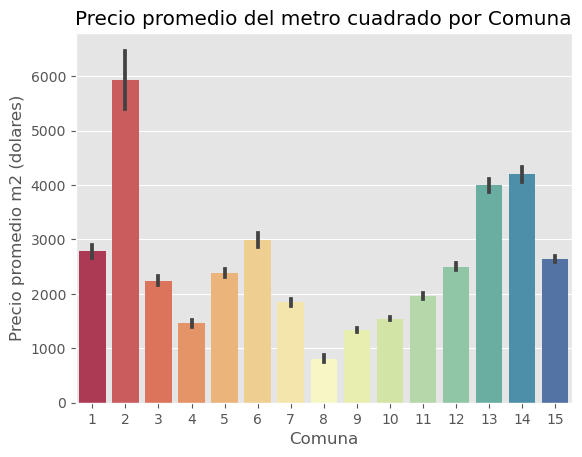

In [44]:
ax3=sns.barplot(data=df_dolar_f, x='Comuna', y='Dolarm2',
                estimator='mean', 
                errorbar='se',
                palette=sns.color_palette('Spectral',15), 
                fill=True,
                width= 0.8, 
                )
plt.title('Precio promedio del metro cuadrado por Comuna')
#plt.errorbar(x=[i for i in range (0,15)], y=comunas_precio.Dolarm2, yerr=comunas_precio.SE, fmt='none', c='black', capsize=1)
ax3.set(ylabel= 'Precio promedio m2 (dolares)')
#ax1.get_legend().remove()
plt.show()


In [45]:
df_dolar_f.Dolarm2.describe()

count     5143.000000
mean      2410.490375
std       1749.997963
min        355.000000
25%       1223.000000
50%       1917.000000
75%       3056.000000
max      21429.000000
Name: Dolarm2, dtype: float64

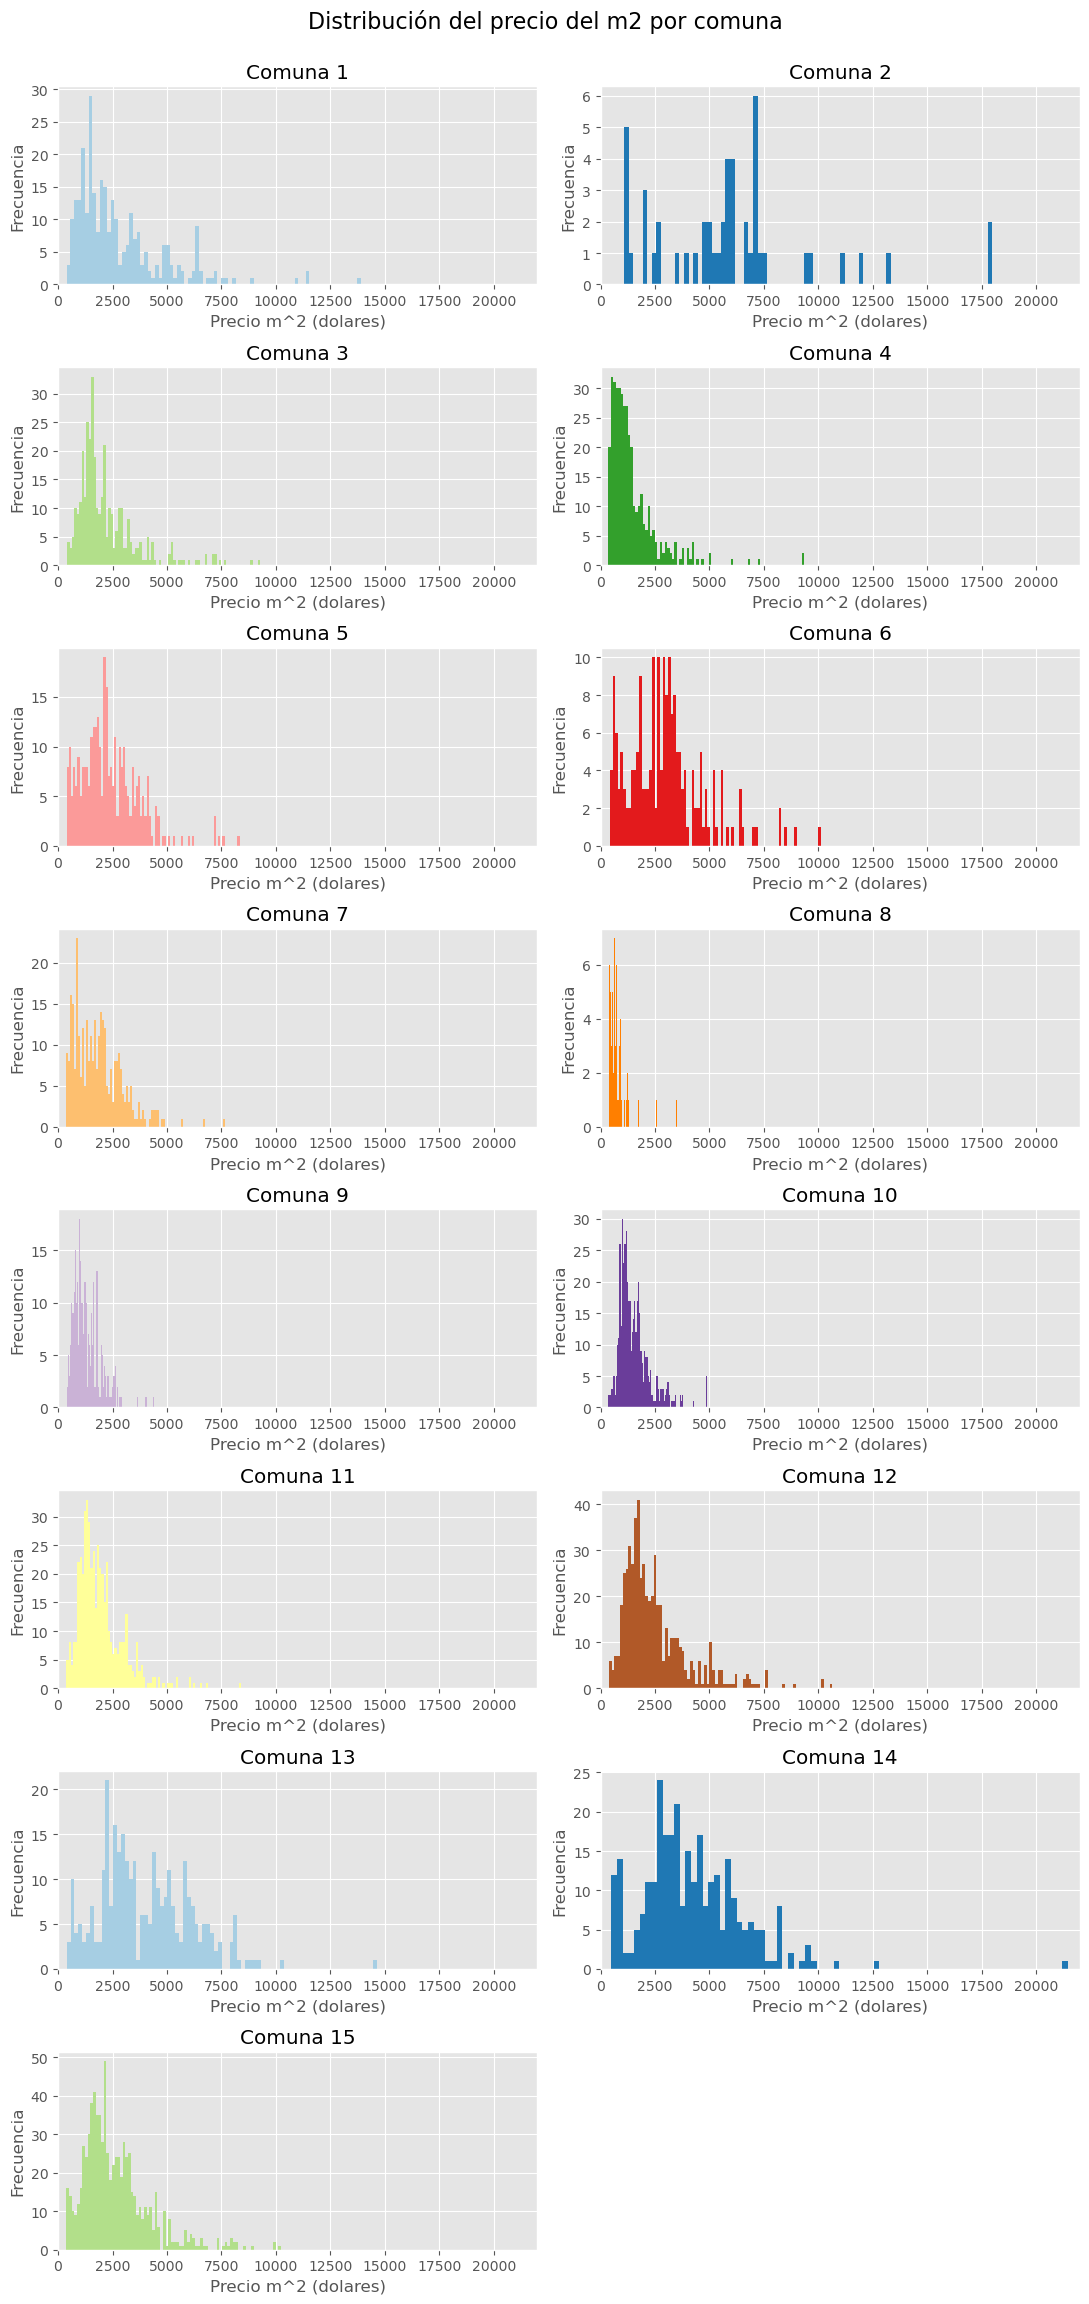

In [46]:
fig, ax = plt.subplots(8, 2, figsize=(11, 23))
fig.suptitle('Distribución del precio del m2 por comuna', fontsize=16, y=1.00)
comuna=[i for i in range (15)]

paleta= sns.color_palette ('Paired', n_colors=len(comuna))

for i in range(8):
    for j in range(2):
        comuna_n=i*2+j+1 #calcula el nro de comuna de 1 a 16
        if comuna_n<16:
            color=paleta[comuna_n-1]
            ax[i, j].hist(df_dolar_f[df_dolar_f.Comuna == comuna_n]['Dolarm2'], bins=80, color=color)
            #print(comuna_n)
            ax[i, j].set_xlim(0, 22000)
            ax[i, j].set_title(f'Comuna {comuna_n}')
            ax[i, j].set_xlabel('Precio m^2 (dolares)')
            ax[i, j].set_ylabel('Frecuencia')
        if comuna_n==16: #elimina el subplot vacío de comuna 16
            break
for i in range(len(comuna), len(ax.flat)): #oculta los subplots no utilizados
    ax.flat[i].set_visible(False)
plt.tight_layout()
plt.show()

A partir de la distribución de precios por metro cuadrado por comuna se puede ver que hay mayor concentración de terrenos en el rango de precios bajo-medio. La distribución es claramente asimétrica.  
La Comuna 2 presenta una distribución de precios por metro cuadrado diferente a las demás comunas, con valores más extremos y menor cantidad de oferta. 

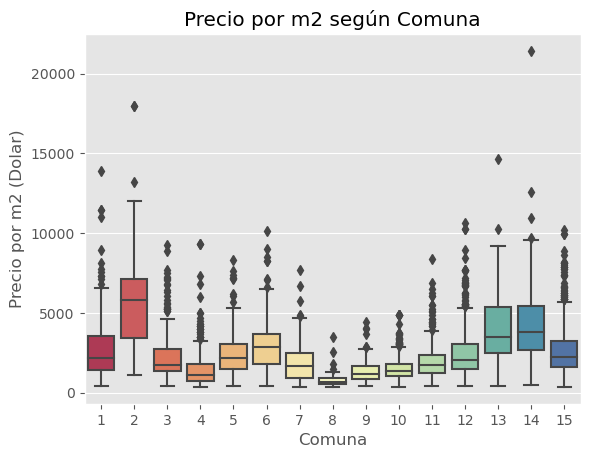

In [47]:
fig4=sns.boxplot(data=df_dolar_f, x='Comuna', y='Dolarm2',
           palette=sns.color_palette('Spectral',n_colors=15)
           )
fig4.set_ylabel('Precio por m2 (Dolar)')
fig4.set_title('Precio por m2 según Comuna')
plt.show()

El grafico de Boxplot muestra nuevamente que la Comuna 2 registra el mayor precio (mediana) por metro cuadrado.

La Comuna 8 es la de menor precio promedio por m2.  
Las Comunas 8, 9, 4 y  10. son las de menor precio por metro cuadrado en promedio.

In [125]:
comunas_precio.sort_values(by='Dolarm2', ascending=True).head(4)


,Comuna,Dolarm2,SE
7,8,810.6,62.9
8,9,1338.1,38.5
3,4,1456.2,58.9
9,10,1544.7,33.9
